# Dimensionality Reduction

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn import datasets

## Load the Dataset

Let's first load the data

In [134]:
RANDOM_STATE = 49

iris = datasets.load_iris()
X = iris.data
y = iris.target

# perform PCA with 3 principal components (there are 4 features)
pca = PCA(n_components=3)
pca.fit(X)
X_std = pca.transform(X)

# create two different train/test splits with and without PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, random_state=RANDOM_STATE)

## Classification
Let's use a ridge classifier using classification accuracy to judge the effectiveness of PCA

In [135]:
clf_no_pca = RidgeClassifier()
clf_no_pca.fit(X_train, y_train)
y_pred = clf_no_pca.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)
print("Without PCA, the ridge classifier gets an accuracy of %.2f%%" % acc)

Without PCA, the ridge classifier gets an accuracy of 86.84%


In [136]:
clf_pca = RidgeClassifier()
clf_pca.fit(X_std_train, y_std_train)
y_std_pred = clf_pca.predict(X_std_test)
acc = 100 * accuracy_score(y_std_test, y_std_pred)
print("With PCA, the ridge classifier gets an accuracy of %.2f%%" % acc)

With PCA, the ridge classifier gets an accuracy of 84.21%


## Plotting
Now, we will plot the first and second dimension with and without PCA

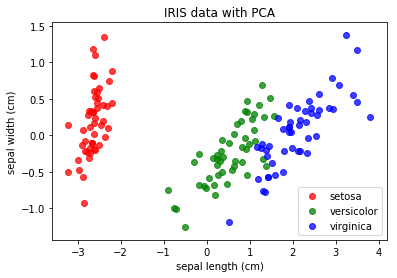

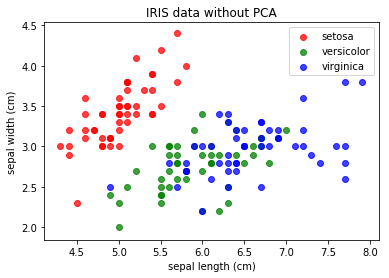

In [137]:
colors = ['red', 'green', 'blue']
dim_1 = 0
dim_2 = 1

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_std[y == i, dim_1], X_std[y == i, dim_2], color=color, alpha=.75,
                label=target_name)
plt.legend()
plt.xlabel(iris.feature_names[dim_1])
plt.ylabel(iris.feature_names[dim_2])
plt.title('IRIS with PCA')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y == i, dim_1], X[y == i, dim_2], color=color, alpha=.75,
                label=target_name)
plt.legend()
plt.xlabel(iris.feature_names[dim_1])
plt.ylabel(iris.feature_names[dim_2])
plt.title('IRIS without PCA')

plt.show()